In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

np.random.seed(0)
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

In [2]:
Kmeans = np.array([0.03, 0.02, 0.02, 0.02, 0.04, 0.02, 0.05])
AffinityPropagation = np.array([3.71, 6.03, 3.83, 3.33, 2.98, 2.77, 2.72])
SpectralClustering = np.array([0.68, 0.90, 0.16, 0.18, 0.46, 0.30, 0.29])
AgglomerativeClustering = np.array([0.14, 0.14, 0.17, 0.14, 0.30, 0.14, 0.12])
GaussianMixture = np.array([0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.01])
DBSCAN = np.array([0.02, 0.03, 0.03, 0.03, 0.01, 0.03, 0.02])
HDBSCAN = np.array([0.05, 0.05, 0.06, 0.05, 0.05, 0.06, 0.07])
ListOfClusters = np.array([0.15, 0.16, 0.19, 0.20, 0.17, 0.16, 0.34])

In [3]:
d = {'Kmeans': Kmeans,
     'AffinityPropagation': AffinityPropagation,
     'SpectralClustering': SpectralClustering,
     'AgglomerativeClustering': AgglomerativeClustering,
     'GaussianMixture': GaussianMixture,
     'DBSCAN': DBSCAN,
     'HDBSCAN': HDBSCAN,
     'ListOfClusters': ListOfClusters
    }

In [4]:
dataframe = pd.DataFrame(data=d)
orden = ['Kmeans', 'AffinityPropagation', 'SpectralClustering', 'AgglomerativeClustering', 'GaussianMixture', 'DBSCAN', 'HDBSCAN', 'ListOfClusters']

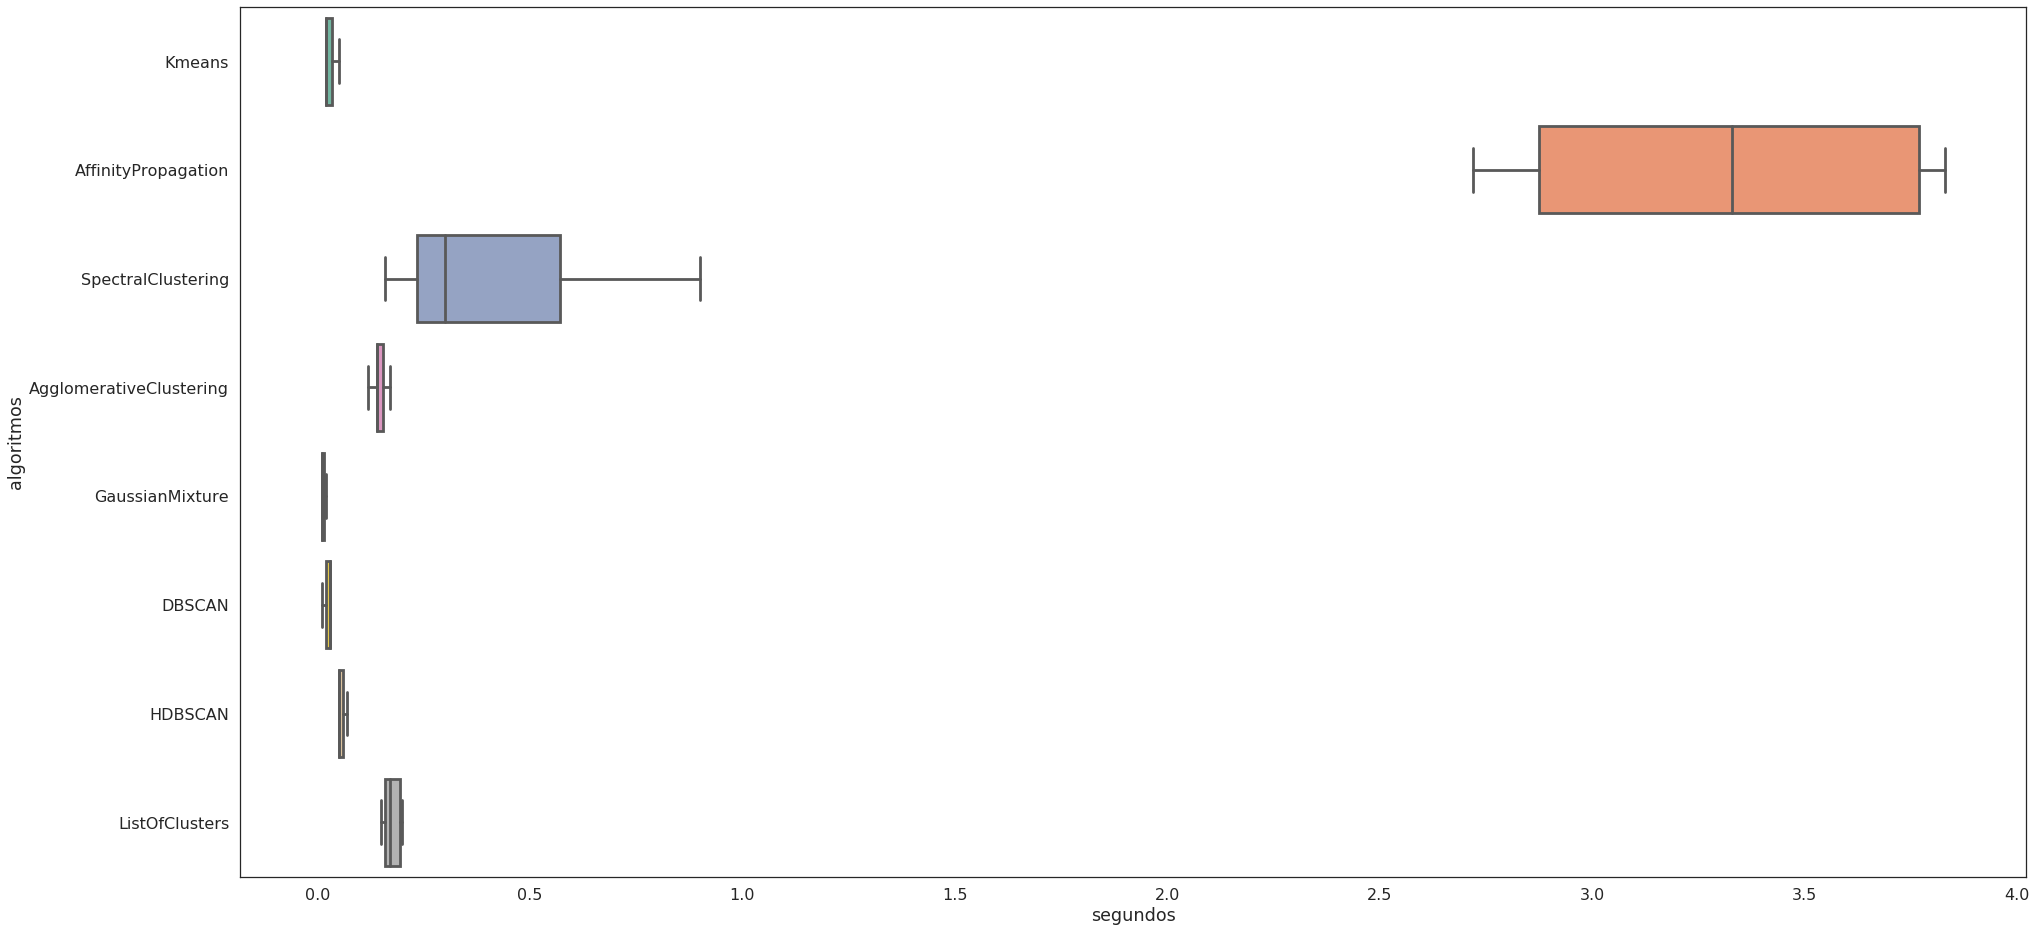

In [5]:
plt.figure(figsize=(32,16))
ax = sns.boxplot(data=dataframe, orient="h", palette="Set2", showfliers=False,
                order=orden)
plt.xlabel('segundos')
plt.ylabel('algoritmos');


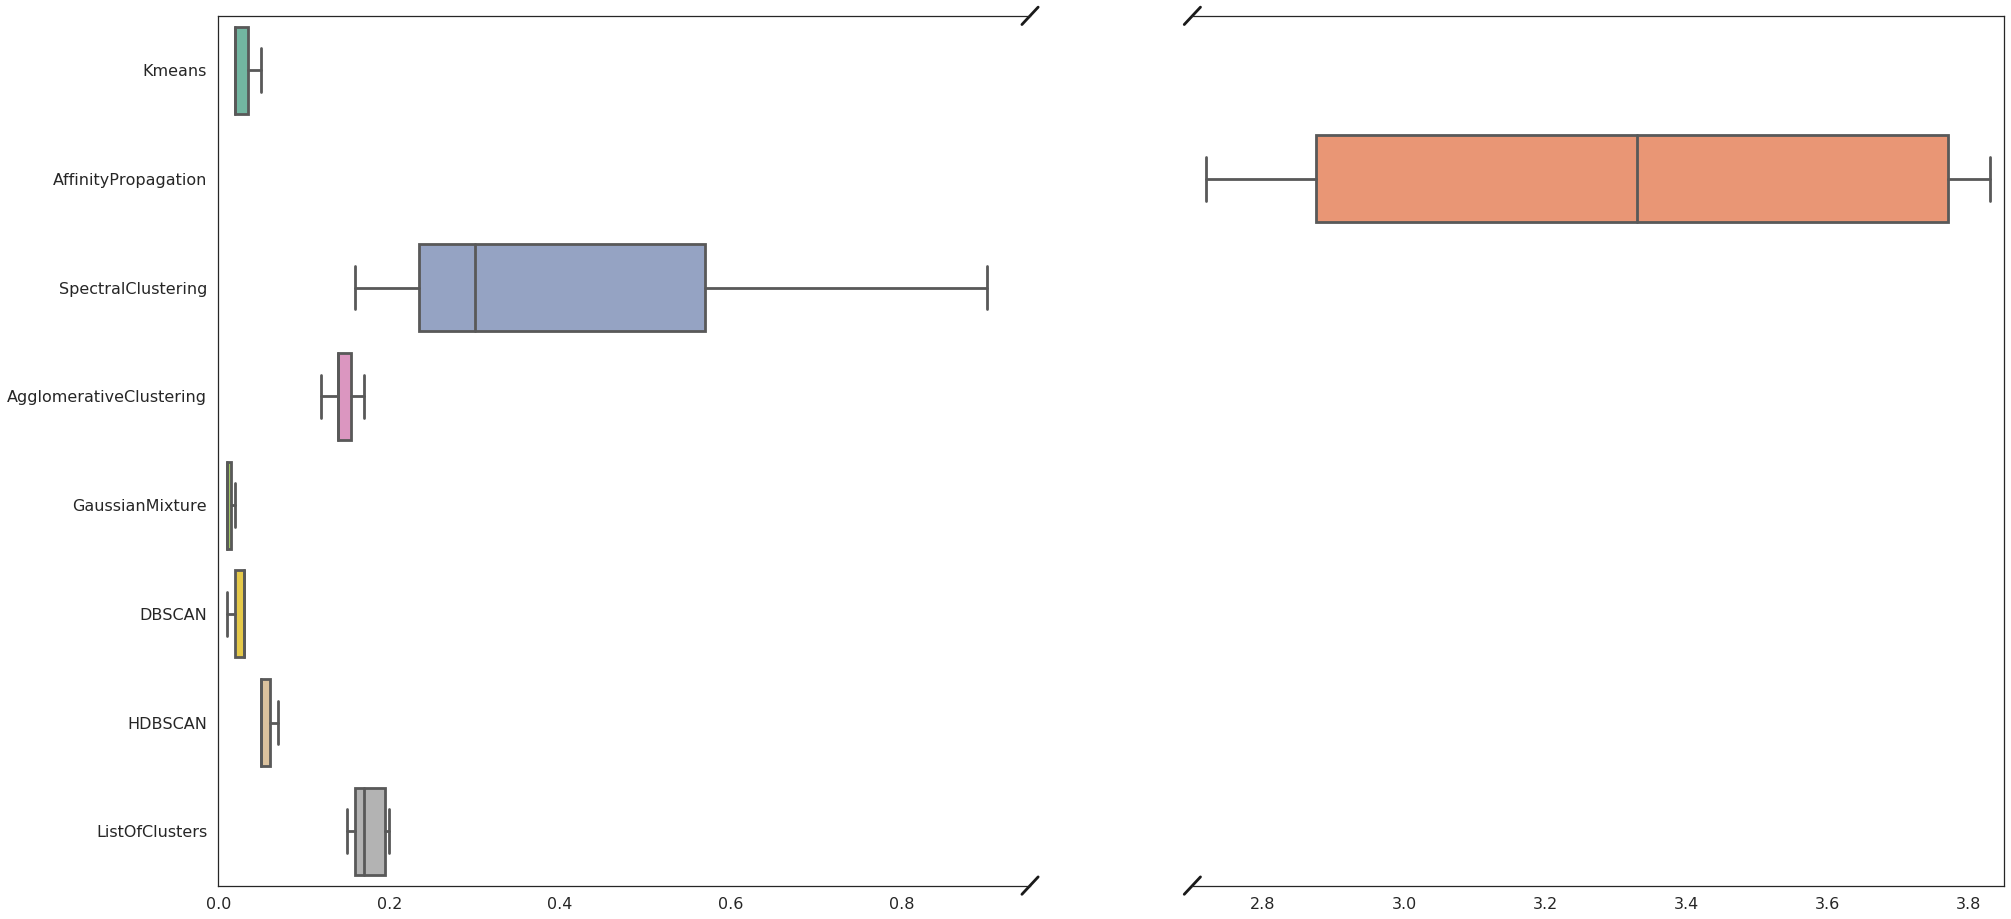

In [6]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w', figsize=(32,16))

# plot the same data on both axes
sns.boxplot(data=dataframe, orient="h", palette="Set2", showfliers=False,
                order=orden, ax=ax)
sns.boxplot(data=dataframe, orient="h", palette="Set2", showfliers=False,
                order=orden, ax=ax2)

ax.set_xlim(0,0.95)
ax2.set_xlim(2.7,3.85)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
#ax2.yaxis.tick_right()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .010 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# plt.savefig('times.png', dpi=100)
plt.show();